In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
syp.interactive.printing.init_printing(use_latex= True)

In [2]:
def Rossler_System(a, b, c, N, h, t0, x0, y0, z0):
    t = np.zeros(N)
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    t[0] = t0
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for i in range(1, len(t)):
        kx1 = h * (- y[i-1] - z[i-1])
        kx2 = h * (- (y[i-1]) - (z[i-1])) 
        kx3 = h * (- (y[i-1]) - (z[i-1]))
        kx4 = h * (- (y[i-1]) - (z[i-1]))
        x[i] = x[i-1] + (1/6) * (kx1 + 2 * kx2 + 2 * kx3 + kx4)

        ky1 = h * (x[i-1] + a * y[i-1])
        ky2 = h * ((x[i-1]) + a * (y[i-1] + (ky1/2))) 
        ky3 = h * ((x[i-1]) + a * (y[i-1] + (ky2/2))) 
        ky4 = h * ((x[i-1]) + a * (y[i-1] + (ky3)))
        y[i] = y[i-1] + (1/6) * (ky1 + 2 * ky2 + 2 * ky3 + ky4)

        kz1 = h * (b + z[i-1] * (x[i-1] - c))
        kz2 = h * (b + (z[i-1] + (kz1/2)) * ((x[i-1]) - c))
        kz3 = h * (b + (z[i-1] + (kz2/2)) * ((x[i-1]) - c))
        kz4 = h * (b + (z[i-1] + (kz3)) * ((x[i-1]) - c))
        z[i] = z[i-1] + (1/6) * (kz1 + 2 * kz2 + 2 * kz3 + kz4)
        t[i] = t[i-1] + h 
    return t, x, y, z

a = 0.2, b = 0.2, c = 2.5


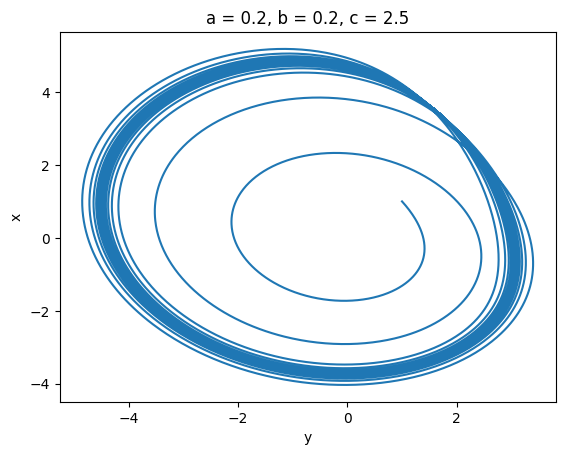

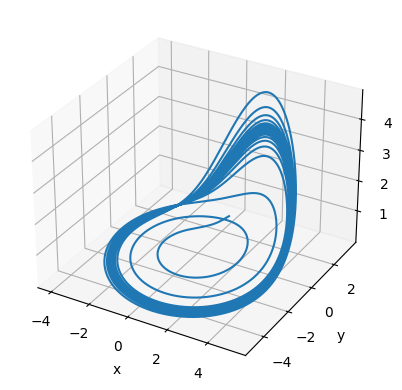

a = 0.2, b = 0.2, c = 3.5


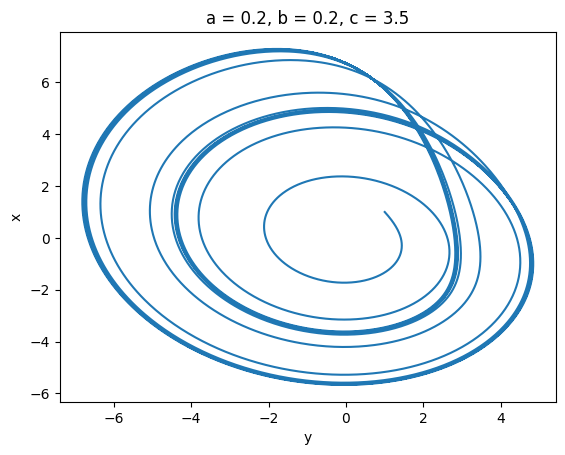

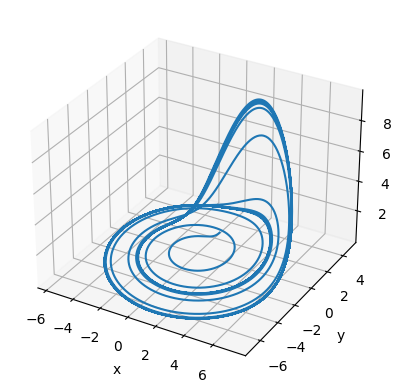

a = 0.2, b = 0.2, c = 4


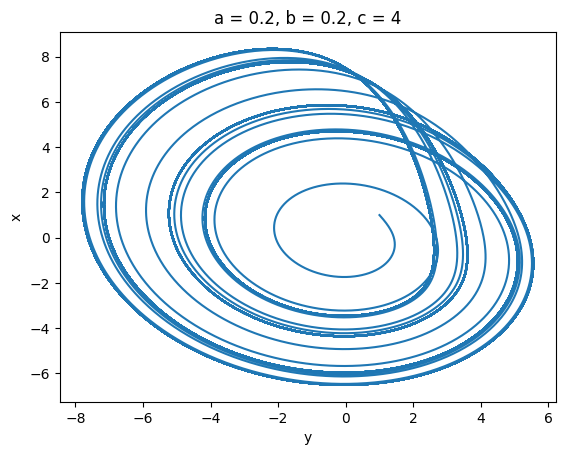

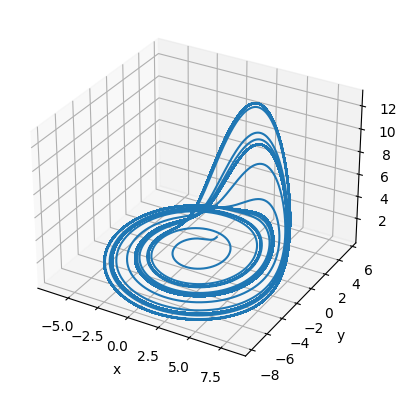

a = 0.2, b = 0.2, c = 5


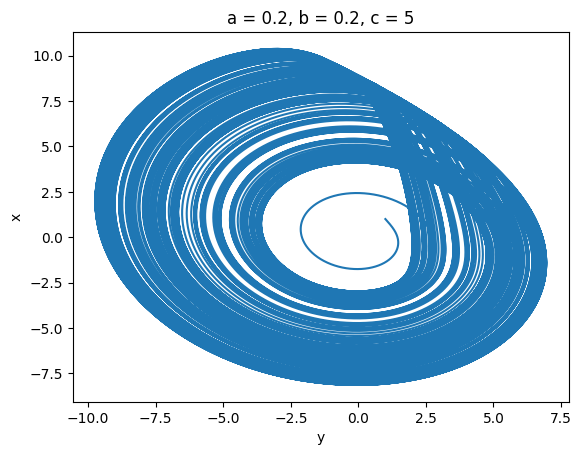

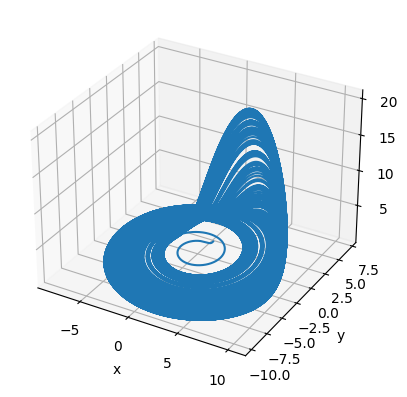

In [3]:
#1
a, b = 0.2, 0.2
c = [2.5, 3.5, 4, 5]
t0 = 0
x0, y0, z0 = 1, 1, 1
h = 1e-2
N = 100000
for i in range(len(c)):
    t, x, y, z = Rossler_System(a, b, c[i], N, h, t0, x0, y0, z0)
    print(f"a = {a}, b = {b}, c = {c[i]}")
    plt.plot(y,x)
    plt.xlabel("y")
    plt.ylabel("x")
    plt.title(f"a = {a}, b = {b}, c = {c[i]}")
    plt.show()
    # plt.figure(figsize= (10, 10))
    # plt.plot(t,x)
    # plt.xlabel("t")
    # plt.ylabel("x")
    # plt.title(f"a = {a}, b = {b}, c = {c[i]}")
    # plt.show()
    # plt.figure(figsize= (10, 10))
    # plt.plot(t,y)
    # plt.xlabel("t")
    # plt.ylabel("y")
    # plt.title(f"a = {a}, b = {b}, c = {c[i]}")
    # plt.show()
    # plt.figure(figsize= (10, 10))
    # plt.plot(t,z)
    # plt.xlabel("t")
    # plt.ylabel("z")
    # plt.title(f"a = {a}, b = {b}, c = {c[i]}")
    # plt.show()
    ax = plt.axes(projection = "3d")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot3D(x, y, z)
    plt.show()

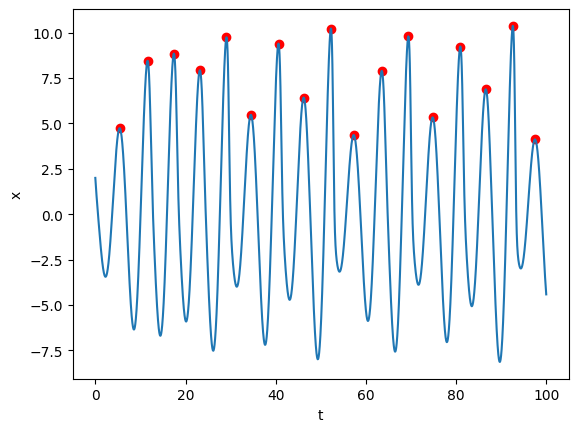

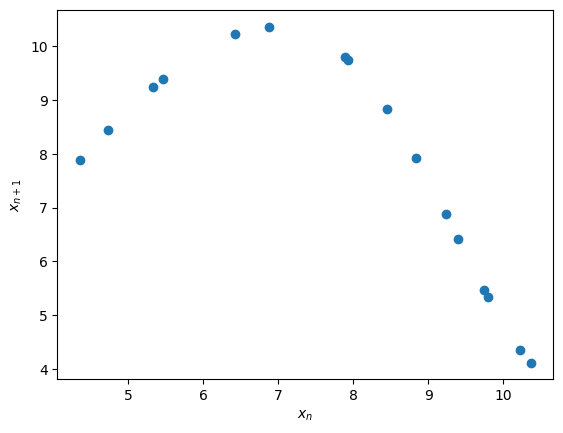

In [8]:
#2
a, b, c = 0.2, 0.2, 5
N = 10000
h = 1e-2
t0, x0, y0, z0 = 0, 2, 2, 2
t, x, y, z = Rossler_System(a, b, c, N, h, t0, x0, y0, z0)
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")
indices = []
max_x = []
max_t = []
for i in range(1, len(x) - 1):
    if x[i] > x[i-1] and x[i] > x[i+1]:
        indices.append(i)
        max_x.append(x[i])
        max_t.append(t[i])
xs = x[indices[0]: indices[1] + 1]
ts = t[indices[0]: indices[1] + 1]
plt.scatter(max_t, max_x, color = 'r')
plt.show()
plt.scatter(max_x[:-1], max_x[1:])
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.show()

In [4]:
def maximum(x, t):
    indices = []
    max_x = []
    max_t = []
    for i in range(1, len(x) - 1):
        if x[i] > x[i-1] and x[i] > x[i+1]:
            indices.append(i)
            max_x.append(x[i])
            max_t.append(t[i])
    return max_x, max_t

In [5]:
#3
a, b = 0.2, 0.2
c = [2.5, 3.5, 4, 5]
t0 = 0
x0, y0, z0 = 2, 2, 2
h = 1e-2
N = 100000
n = 1000
c = np.linspace(2.5, 20, n)
cs = []
values = []
for i in range(len(c)):
    t, x, y, z = Rossler_System(a, b, c[i], N, h, t0, x0, y0, z0)
    x_max, t_max = maximum(x, t)
    cs.extend([c[i]] * (n - 10))
    values.extend(x_max[10:n])
plt.scatter(cs, values, c = 'k', marker= '.', s = 1)
plt.xlabel('c')
plt.ylabel('maxima')
plt.show()


KeyboardInterrupt: 